In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv('train_ScotiaDSD.csv') 

In [3]:
train.head()

,EVENT_MONTH,EVENT_DAY_OF_WEEK,EVENT_TIME,TRANSACTION_ID,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,USER_AGENT,...,COUNT_LOW_AMT_PAST_30DAY,COUNT_MANUAL_ENTRY_PAST_30DAY,COUNT_PHONE_ORDER_PAST_30DAY,COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY,COUNT_PLANNED_PAST_30DAY,COUNT_SWIPE_PAST_30DAY,COUNT_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY,PREV_M_INFLATION,PREV_M_UNEMP_RATE
0,2,4,14:16,a316accb,1.0,537.10,11.70,29200.0,1,NaN,...,16,39,73,60,13,22,4,14,1.1,5.7
1,2,4,12:51,8352728b,0.0,20371.88,96.35,30700.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,...,1,50,93,93,0,0,0,0,1.1,5.7
2,2,4,15:26,d50120e1,0.0,15628.17,193.72,19500.0,0,NaN,...,9,3,42,42,2,33,0,12,1.1,5.7
3,2,4,16:19,e96e2139,0.0,12913.98,47.15,18400.0,0,NaN,...,4,7,75,72,12,61,0,20,1.1,5.7
4,2,4,8:15:,32502a99,0.0,26779.35,121.88,29200.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,...,11,6,41,42,10,30,4,16,1.1,5.7


In [15]:
y_train = train["FRAUD_FLAG"]

In [27]:
X_train = train.drop(["FRAUD_FLAG", "TRANSACTION_ID", "USER_AGENT", "CITY","EVENT_TIME"], axis=1)

In [26]:
X_train["EVENT_TIME"] = [60*int(x[0:2]) + int(x[3:5]) for x in X_train['EVENT_TIME']]

ValueError: invalid literal for int() with base 10: '8:'

In [28]:
X_train.dtypes

EVENT_MONTH                                    int64
EVENT_DAY_OF_WEEK                              int64
AVAIL_CRDT                                   float64
AMOUNT                                       float64
CREDIT_LIMIT                                 float64
                                              ...   
COUNT_SWIPE_PAST_30DAY                         int64
COUNT_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY      int64
COUNT_WEEKEND_PAST_30DAY                       int64
PREV_M_INFLATION                             float64
PREV_M_UNEMP_RATE                            float64
Length: 170, dtype: object

In [29]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
sort = rf.feature_importances_.argsort()


Text(0.5, 0, 'Feature Importance')

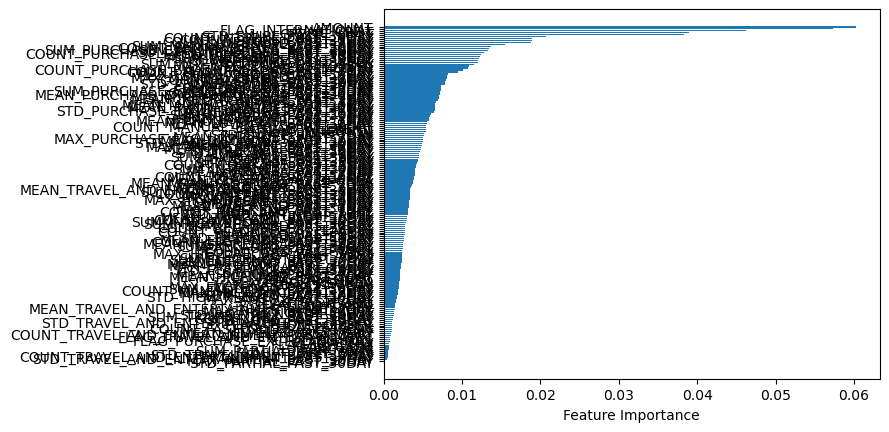

In [32]:
plt.barh(X_train.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")


In [33]:
X_train.columns[sort]

Index(['STD_PARTIAL_PAST_30DAY', 'MAX_PARTIAL_PAST_30DAY',
       'STD_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY',
       'COUNT_TRAVEL_AND_ENTERTAINMENT_PAST_7DAY',
       'STD_TRAVEL_ONLY_PAST_30DAY', 'FLAG_TRAVEL_ONLY',
       'SUM_PARTIAL_PAST_7DAY', 'FLAG_ATM', 'FLAG_CASH', 'FLAG_JEWELRY',
       ...
       'SUM_MANUAL_ENTRY_PAST_30DAY', 'SUM_SWIPE_PAST_7DAY',
       'COUNT_WEEKEND_PAST_7DAY', 'COUNT_SWIPE_PAST_30DAY',
       'COUNT_INTERNET_PAST_7DAY', 'STD_SWIPE_PAST_30DAY', 'CREDIT_LIMIT',
       'AVAIL_CRDT', 'FLAG_INTERNATIONAL', 'AMOUNT'],
      dtype='object', length=170)

In [39]:
import pickle

In [40]:
with open("obj.bin", "wb") as f: # "wb" because we want to write in binary mode
    pickle.dump(rf, f)

In [42]:
with open("obj.bin", "rb") as f: # "rb" because we want to read in binary mode
    myrf = pickle.load(f)

In [60]:
X_train["STD_PARTIAL_PAST_30DAY"].loc[X_train["STD_PARTIAL_PAST_30DAY"] > 0]

5          4.35
63        13.05
244        2.62
294      215.99
330        8.36
          ...  
89104     36.97
89162     29.47
89180      3.01
89201     74.44
89207      3.49
Name: STD_PARTIAL_PAST_30DAY, Length: 1743, dtype: float64

In [61]:
X_train["MAX_PARTIAL_PAST_30DAY"].loc[X_train["STD_PARTIAL_PAST_30DAY"] > 0]

5         24.60
63        22.55
244       36.90
294      305.18
330       22.55
          ...  
89104     61.50
89162     61.86
89180     15.73
89201    180.94
89207      9.22
Name: MAX_PARTIAL_PAST_30DAY, Length: 1743, dtype: float64

In [69]:
np.average(y_train.loc[X_train["STD_PARTIAL_PAST_30DAY"] < 1])

0.024517028252847562

In [106]:
q,r = np.linalg.qr(X_train.iloc[:, 6:33])

In [111]:
mask = np.array(np.abs(np.diag(r))<0.001)

In [134]:
np.argmax((X_train.iloc[:, 6:33]).sum(axis=1))

36436

In [104]:
X_train.insert(6, 'ones', np.ones(X_train.shape[0]))

In [119]:
sum(X_train["FLAG_GAS"])

9121

In [121]:
sum(X_train["FLAG_PURCHASE_EXCLUDING_GAS"])

80109

In [135]:
X_train.iloc[36436,6:33]

ones                             1.0
FLAG_LX                          1.0
FLAG_ATM                         0.0
FLAG_AUTO                        0.0
FLAG_CASH                        0.0
FLAG_LS                          0.0
FLAG_DISCOUNT                    0.0
FLAG_RECREA                      1.0
FLAG_ELCTRNCS                    0.0
FLAG_REG_AMT                     1.0
FLAG_FASTFOOD                    0.0
FLAG_GAS                         0.0
FLAG_HIGH_AMT                    1.0
FLAG_HIGH_RECREA                 1.0
FLAG_INTERNET                    0.0
FLAG_INTERNATIONAL               1.0
FLAG_JEWELRY                     0.0
FLAG_LOW_AMT                     0.0
FLAG_MANUAL_ENTRY                0.0
FLAG_PHONE_ORDER                 0.0
FLAG_PURCHASE_EXCLUDING_GAS      1.0
FLAG_PLANNED                     1.0
FLAG_RISKY                       0.0
FLAG_SWIPE                       1.0
FLAG_TRAVEL_ONLY                 1.0
FLAG_TRAVEL_AND_ENTERTAINMENT    1.0
FLAG_WEEKEND                     1.0
N